<a href="https://colab.research.google.com/github/iamslash/examplesofml/blob/master/scikitlearn/scikitlearn_HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check Versions

In [12]:
# An IPython magic extension for printing date and time stamps, version numbers, and hardware information.  
!pip install watermark
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.6.7
IPython 5.5.0

numpy 1.16.3
scipy 1.3.0
sklearn 0.21.2
pandas 0.24.2
matplotlib 3.0.3


# Import Libraries


In [0]:
# reference: 
#   https://partrita.github.io/posts/predict-housing/
#   https://github.com/rickiepark/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb
#   https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb
import pandas as pd
import numpy as np
import os
import tarfile
from six.moves import urllib
import matplotlib.pyplot as plt

np.random.seed(42)
%matplotlib inline

# Fetch Datasets


In [0]:
CFG_URL_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
CFG_PATH = os.path.join("input", "housing")
CFG_URL = CFG_URL_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=CFG_URL, housing_path=CFG_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()
  
def fetch_california_img(remote_url, local_path):  
  if not os.path.isdir(local_path):
    os.makedirs(local_path)
  local_path = os.path.join(local_path, "california.png")
  urllib.request.urlretrieve(remote_url, local_path)
    
fetch_housing_data()
fetch_california_img("https://github.com/ageron/handson-ml/raw/master/images/end_to_end_project/california.png", "./input/housing/")

# EDA


In [15]:
df_org = pd.read_csv('./input/housing/housing.csv')
df_org.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
df_org.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [17]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
df_org.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [19]:
df_org['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

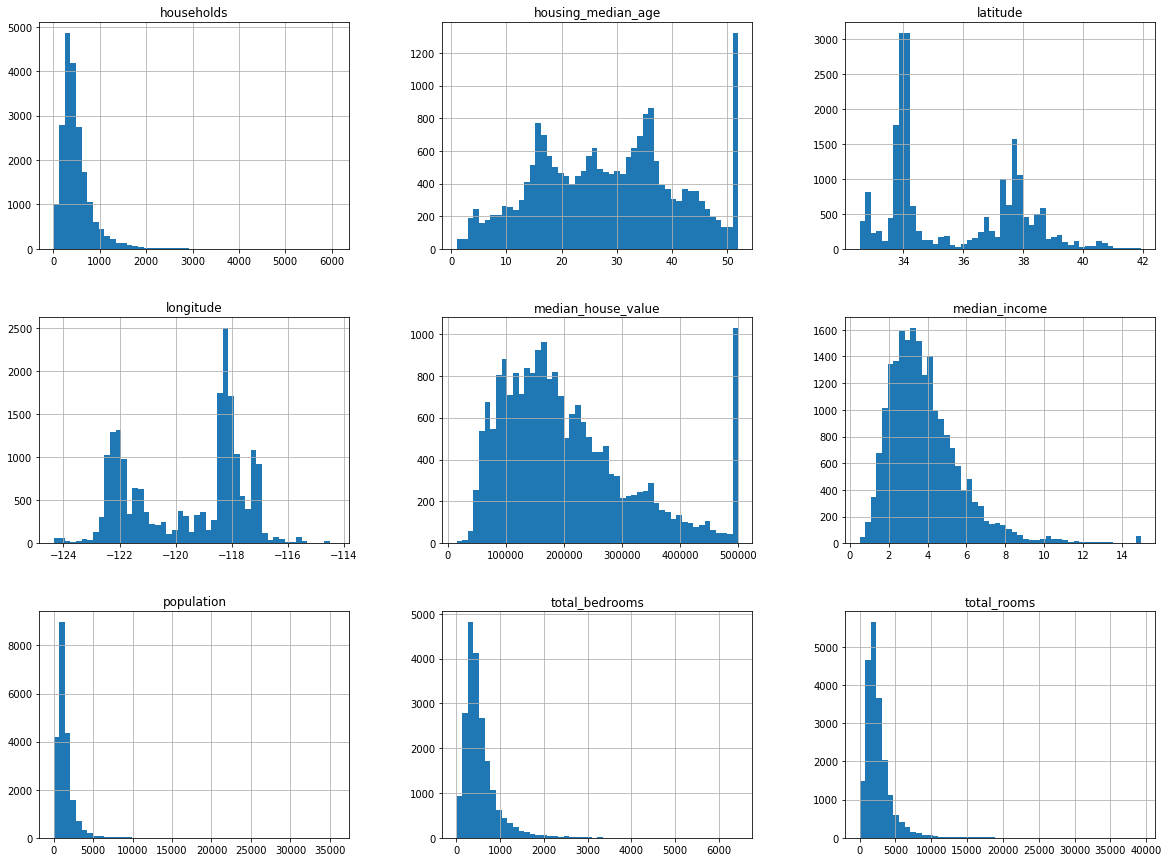

In [20]:
fig = df_org.hist(bins=50, figsize=(20,15))

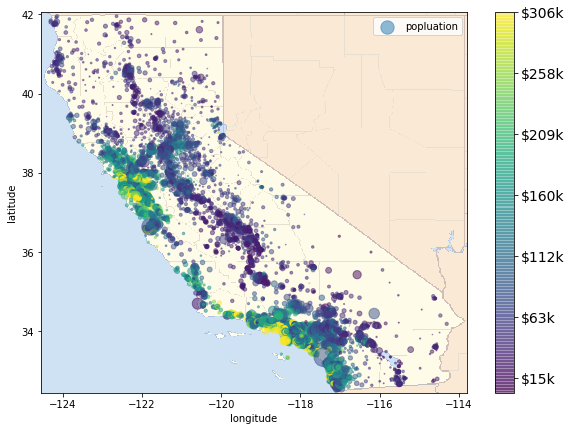

In [21]:
import matplotlib.image as mpimg

img = mpimg.imread('./input/housing/california.png')
ax = df_org.plot.scatter(x="longitude", y="latitude", figsize=(10,7),
                            s=df_org['population']/100, label='popluation',
                            c='median_house_value', cmap=plt.get_cmap(),
                            colorbar=False, alpha=0.5)
plt.imshow(img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
prices = df_org["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
plt.show()

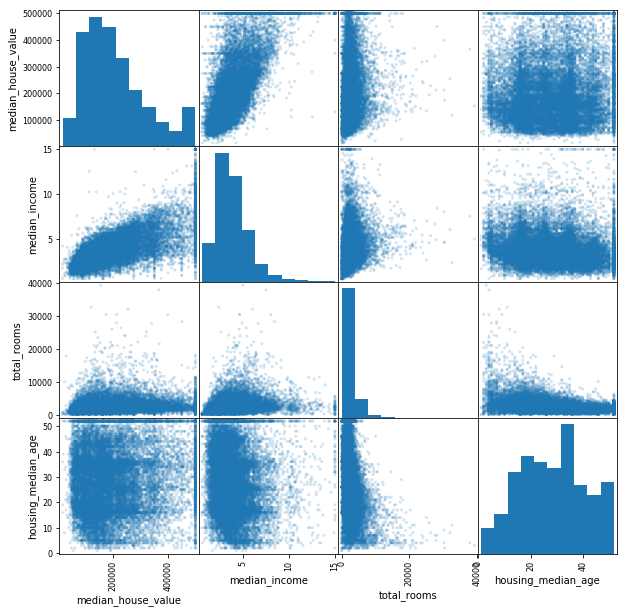

In [24]:

from pandas.plotting import scatter_matrix

corr_matrix = df_org.corr()
l_cols = ['median_house_value','median_income', 'total_rooms','housing_median_age']
fig = scatter_matrix(df_org[l_cols], figsize = (10,10), alpha = 0.2)

[0, 16, 0, 550000]

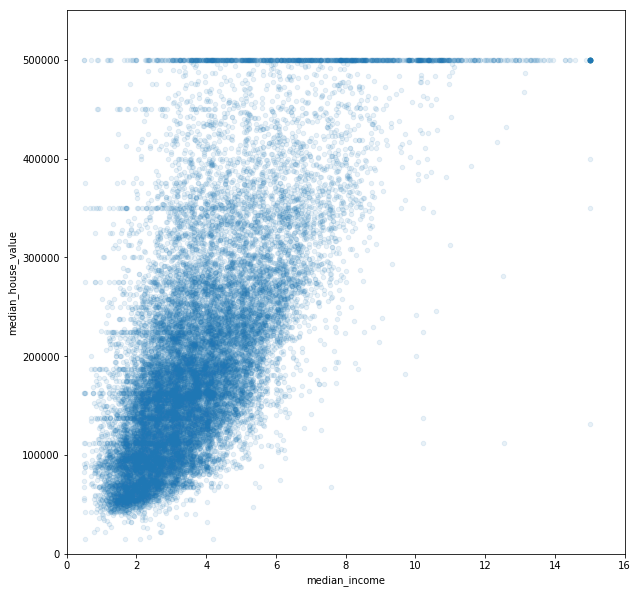

In [26]:
df_org.plot(kind="scatter", x="median_income", y="median_house_value", figsize=(10,10), alpha=0.1)
plt.axis([0, 16, 0, 550000])

# Preproess Datasets

* missing values
* outliers
* Feature Engineering

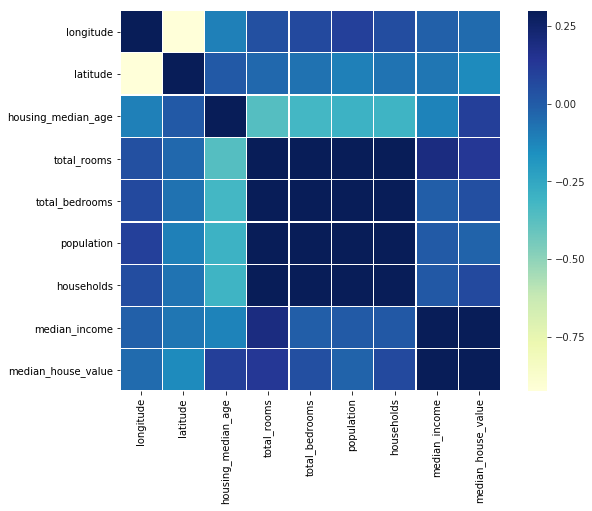

In [27]:

import seaborn as sns

corr = df_org.corr()
f, ax = plt.subplots(figsize=(10, 7))
with sns.axes_style("white"):
  sns.heatmap(corr, vmax=.3, cmap='YlGnBu', square=True, linewidths=.3)

In [0]:
df_org["rooms_per_household"]      = df_org["total_rooms"]/df_org["households"]
df_org["bedrooms_per_room"]        = df_org["total_bedrooms"]/df_org["total_rooms"]
df_org["population_per_household"] = df_org["population"]/df_org["households"]

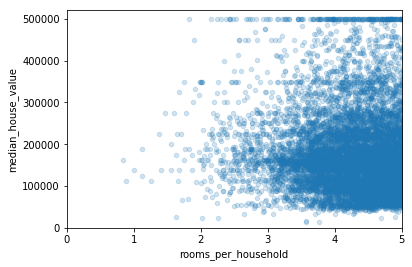

In [29]:
df_org.plot.scatter(x='rooms_per_household', y='median_house_value', alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [0]:
df_tgt = pd.get_dummies(data=df_org, columns=['ocean_proximity'])

In [32]:
from sklearn.preprocessing import Imputer

# process missing values using imputer
imputer = Imputer(strategy='median')
imputer.fit(df_tgt)
na_X = imputer.transform(df_tgt)
df_tgt = pd.DataFrame(na_X, columns=df_tgt.columns)
# df_all.head()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:

# extract X, Y datasets
df_X = df_tgt.drop('median_house_value', axis=1)
df_Y = df_tgt['median_house_value'].copy()

In [34]:
from sklearn.preprocessing import StandardScaler

# rescale datasets
scaler = StandardScaler()
df_X = scaler.fit_transform(df_X)
df_X.shape

(20640, 16)

In [35]:
from sklearn.model_selection import train_test_split

# split data with train, test datasets
df_X_tr, df_X_te, df_Y_tr, df_Y_te = train_test_split(df_X, df_Y, test_size=0.2, random_state=42)
print(df_X_tr.shape, df_X_te.shape)

(16512, 16) (4128, 16)


# Linear Regression


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression(n_jobs=-1)
lr.fit(df_X_tr, df_Y_tr)
na_pred = lr.predict(df_X_te)
rms = np.sqrt(mean_squared_error(df_Y_te, na_pred))
print(rms)

69142.89995819968


# Decision Tree Regressor

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(df_X_tr, df_Y_tr)
na_pred = dtr.predict(df_X_te)
rms = np.sqrt(mean_squared_error(df_Y_te, na_pred))
print(rms)

69903.69210288586


# Random Forest Regressor (BEST)

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(df_X_tr, df_Y_tr)
na_pred = rfr.predict(df_X_te)
rms = np.sqrt(mean_squared_error(df_Y_te, na_pred))
print(rms)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


52502.300551167755


# Support Vector Machine

In [40]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(df_X_tr, df_Y_tr)
na_pred = svr.predict(df_X_te)
rms = np.sqrt(mean_squared_error(df_Y_te, na_pred))
print(rms)

106532.35352547036


# Optimize Random Forest Regressor with GridSearchCV


In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)
gscv = GridSearchCV(rfr, param_grid, cv=5,
                   scoring='neg_mean_squared_error', return_train_score=True)
gscv.fit(df_X_tr, df_Y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
    

In [0]:
cvrslt = gscv.cv_results_
for mean_score, params in zip(cvrslt['mean_test_score'], cvrslt['params']):
  print(np.sqrt(-mean_score), params)

63771.18212680845 {'max_features': 2, 'n_estimators': 3}
54839.61174587258 {'max_features': 2, 'n_estimators': 10}
52771.5433682116 {'max_features': 2, 'n_estimators': 30}
60227.82416437384 {'max_features': 4, 'n_estimators': 3}
52030.38895494534 {'max_features': 4, 'n_estimators': 10}
49974.72803679322 {'max_features': 4, 'n_estimators': 30}
57648.61808861396 {'max_features': 6, 'n_estimators': 3}
51021.047425368786 {'max_features': 6, 'n_estimators': 10}
49393.25851718432 {'max_features': 6, 'n_estimators': 30}
58942.05582791451 {'max_features': 8, 'n_estimators': 3}
51948.31670364377 {'max_features': 8, 'n_estimators': 10}
49958.842668616126 {'max_features': 8, 'n_estimators': 30}
62094.773449584376 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53956.323712151134 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58049.75558190627 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51462.27230511192 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [0]:
df_cv = pd.DataFrame(gscv.cv_results_)
df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.071868,0.004424,0.004505,0.000051,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.906173e+09,-3.901703e+09,-4.057196e+09,-4.061059e+09,-4.407786e+09,-4.066764e+09,1.840925e+08,18,-1.059936e+09,-1.090222e+09,-1.133567e+09,-1.093873e+09,-1.106898e+09,-1.096899e+09,2.393556e+07
1,0.233473,0.003414,0.012246,0.000152,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.965684e+09,-2.940963e+09,-3.030534e+09,-2.971264e+09,-3.128502e+09,-3.007383e+09,6.732009e+07,11,-5.479431e+08,-5.685184e+08,-5.960481e+08,-5.815513e+08,-5.777055e+08,-5.743533e+08,1.590760e+07
2,0.694580,0.004322,0.034425,0.000142,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.781555e+09,-2.740385e+09,-2.811129e+09,-2.723865e+09,-2.867259e+09,-2.784836e+09,5.135729e+07,9,-4.210138e+08,-4.399846e+08,-4.472842e+08,-4.369943e+08,-4.342895e+08,-4.359133e+08,8.621764e+06
3,0.123337,0.000541,0.005083,0.000091,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.799386e+09,-3.616914e+09,-3.783616e+09,-3.299205e+09,-3.637785e+09,-3.627391e+09,1.799455e+08,16,-9.793192e+08,-9.920349e+08,-9.705860e+08,-9.288889e+08,-9.368219e+08,-9.615302e+08,2.451508e+07
4,0.372091,0.003760,0.012361,0.000172,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.703081e+09,-2.704343e+09,-2.766828e+09,-2.670813e+09,-2.690744e+09,-2.707161e+09,3.217073e+07,8,-5.172499e+08,-4.992371e+08,-5.213874e+08,-5.196590e+08,-4.984243e+08,-5.111915e+08,1.018103e+07


In [0]:
gscv.best_params_

{'max_features': 6, 'n_estimators': 30}

In [0]:
gscv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

<BarContainer object of 16 artists>

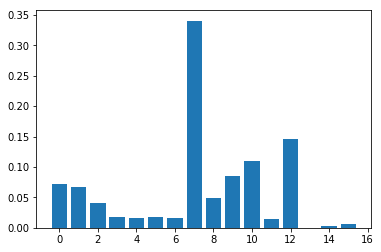

In [0]:
feature_importances = gscv.best_estimator_.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)

# Optimize Random Forest Regressor with RandomizedSearchCV

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

rfr = RandomForestRegressor(random_state=42, n_jobs=-1)
rscv = RandomizedSearchCV(rfr, param_distributions=param_distribs,
                          n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rscv.fit(df_X_tr, df_Y_tr)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_score=False,
                                                   random_state...


In [43]:
model = rscv.best_estimator_
na_pred = model.predict(df_X_te)
rms = np.sqrt(mean_squared_error(df_Y_te, na_pred))
print(rms)

48440.27027354851


In [52]:
kpi_features = rscv.best_estimator_.feature_importances_
kpi_features

array([7.03072710e-02, 6.47536370e-02, 4.15933043e-02, 1.58834571e-02,
       1.51444705e-02, 1.57784481e-02, 1.46170496e-02, 3.55222735e-01,
       5.16101333e-02, 7.40290367e-02, 1.12449567e-01, 8.63166970e-03,
       1.52334004e-01, 1.76277874e-04, 3.32597557e-03, 4.14296315e-03])

# Save Model

In [44]:

from sklearn.externals import joblib
joblib.dump(model, "HousePricesModel.pkl") # DIFF
# my_model_loaded = joblib.load("my_model.pkl") # DIFF

['HousePricesModel.pkl']